## Introduction

The dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months and includes 18 behavioral variables as follows:

- CUSTID : Identification of Credit Card holder (Categorical)
- BALANCE : Balance amount left in their account to make purchases
- BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES : Amount of purchases made from account
- ONEOFFPURCHASES : Maximum purchase amount done in one-go
- INSTALLMENTSPURCHASES : Amount of purchase done in installment
- CASHADVANCE : Cash in advance given by the user
- PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
- PURCHASESTRX : Numbe of purchase transactions made
- CREDITLIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
- PRCFULLPAYMENT : Percent of full payment paid by user
- TENURE : Tenure of credit card service for user

The objective is to try to create a segmentation of the credit card holders based on behaviour which can then possibly be used to to define a marketing strategy.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering


In [4]:
df = pd.read_csv("CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


## Data Analysis and Feature Engineering

Through the EDA, I am looking to identify trends in the data and figure out ways to process the data help us during modelling. I will be looking at whether the data contains null values and outliers and how these need to be handled, whether there in intercorrelation between features and and whether we can reduce dimensionaliy in the data. 

In this section, I have attempted to use DBScan to identify outliers and PCA to reduce dimensionaliy.

In [7]:
df.isnull().sum().sort_values(ascending=False).head()

MINIMUM_PAYMENTS       313
CREDIT_LIMIT             1
TENURE                   0
PURCHASES_FREQUENCY      0
BALANCE                  0
dtype: int64

All features available except "CUST_ID" are continuous numerical variables. Null values are present in "MINIMUM_PAYMENTS" and "CREDIT_LIMIT". We can take a look at thier distrubutions to try to determine how we shoudl handle these mission values.

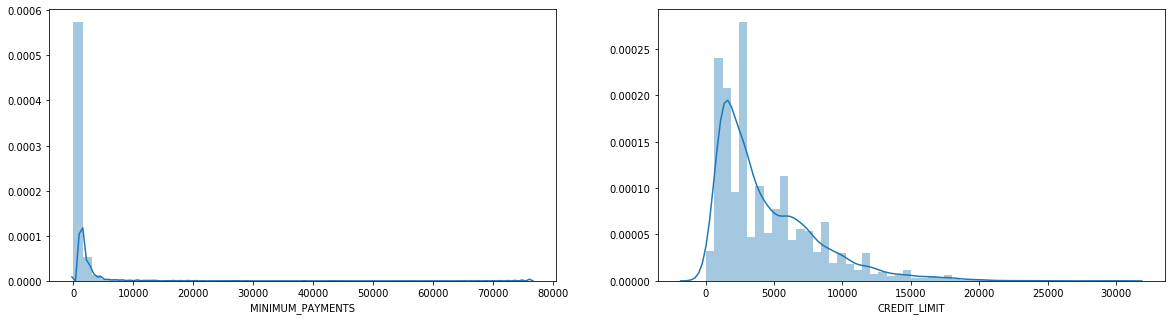

In [8]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.distplot(df.MINIMUM_PAYMENTS.dropna())

plt.subplot(1,2,2)
sns.distplot(df.CREDIT_LIMIT.dropna())

plt.show()

Due to the skewes ditributions, the best way to deal with the missing values might be to replace them with the median of the respective feature. "CUST_ID" can be dropped all together since it will not affect the outcome in any way.

In [9]:
df.loc[(df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].median()
df.loc[(df['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].median()

In [10]:
df.drop(['CUST_ID'], axis=1, inplace=True)

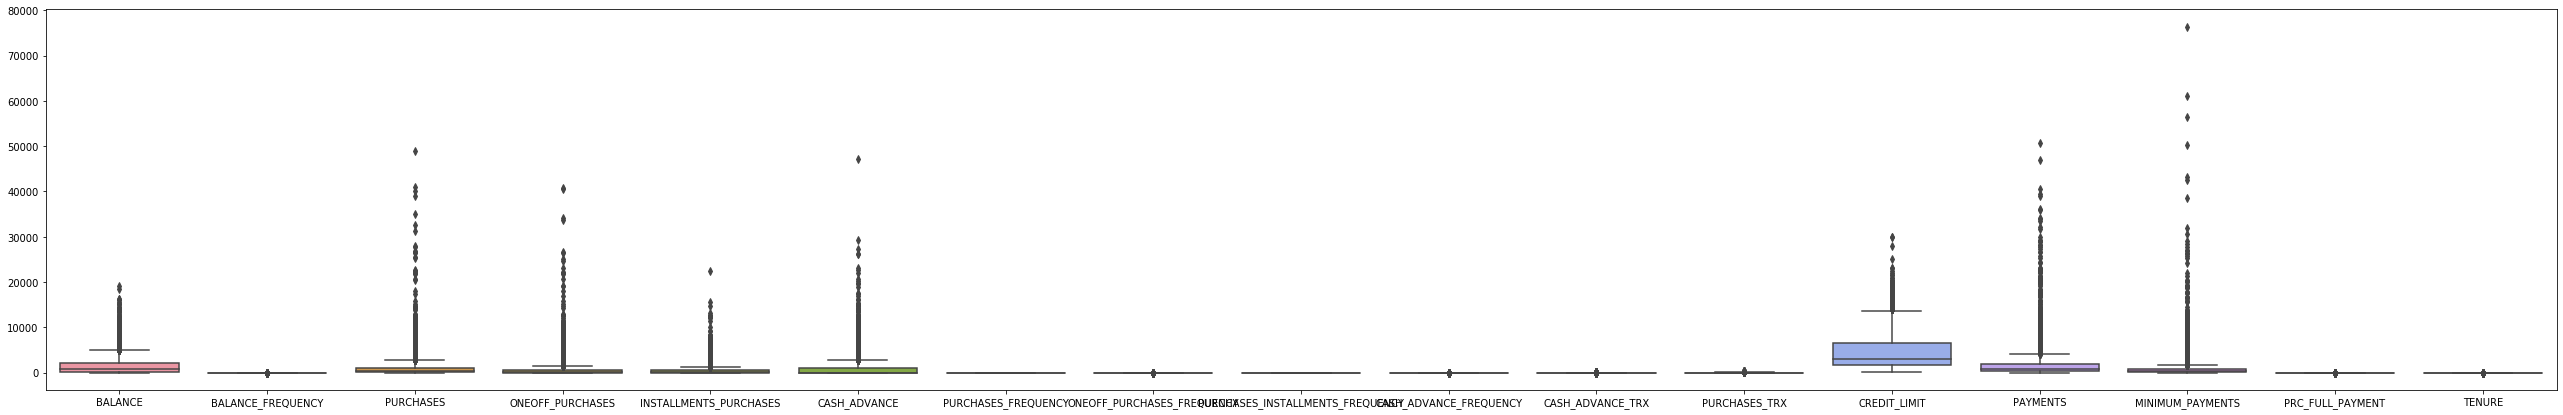

In [11]:
plt.figure(figsize=(45,7))
sns.boxplot(data=df)
plt.show()

We can see there are some outliers present in the data. In order to deal with these I will use DBScan which is able to identify noise in the data which can be considered outliers and eliminated. I will also use PCA with 2 component to help visualize the clusters.

In [12]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = list(df.columns)

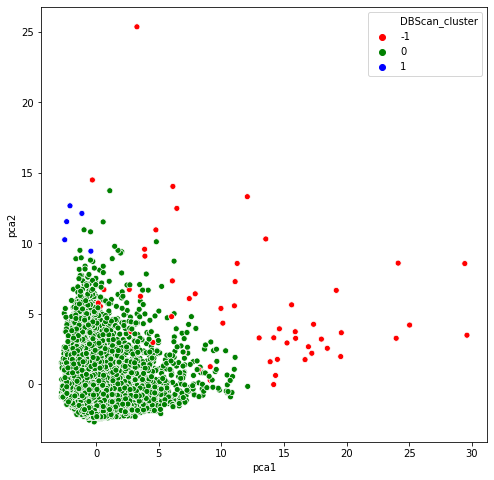

In [13]:
DBScan = DBSCAN(eps=5, min_samples=5).fit(df_scaled)
DBScan_labels = DBScan.labels_

pca = PCA(n_components=2).fit_transform(df_scaled)
pca_df = pd.DataFrame({'pca1':pca[:,0], 'pca2':pca[:,1]})
pca_df['DBScan_cluster'] = DBScan_labels

plt.figure(figsize=(8,8))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "DBScan_cluster", data = pca_df,
                    palette =['red','green','blue'])

plt.show()

In [14]:
pca_df["DBScan_cluster"].value_counts()

 0    8890
-1      55
 1       5
Name: DBScan_cluster, dtype: int64

Based on the DBScan, 55 instances has been classfied as noise  and 5 have been plased outside the main cluster. I have decided to remove these instances as outliers.

In [15]:
drop_index = pca_df[pca_df.DBScan_cluster != 0].index
pca_df.drop(drop_index, inplace=True)
df_scaled.drop(drop_index, inplace=True)
df.drop(drop_index, inplace=True)

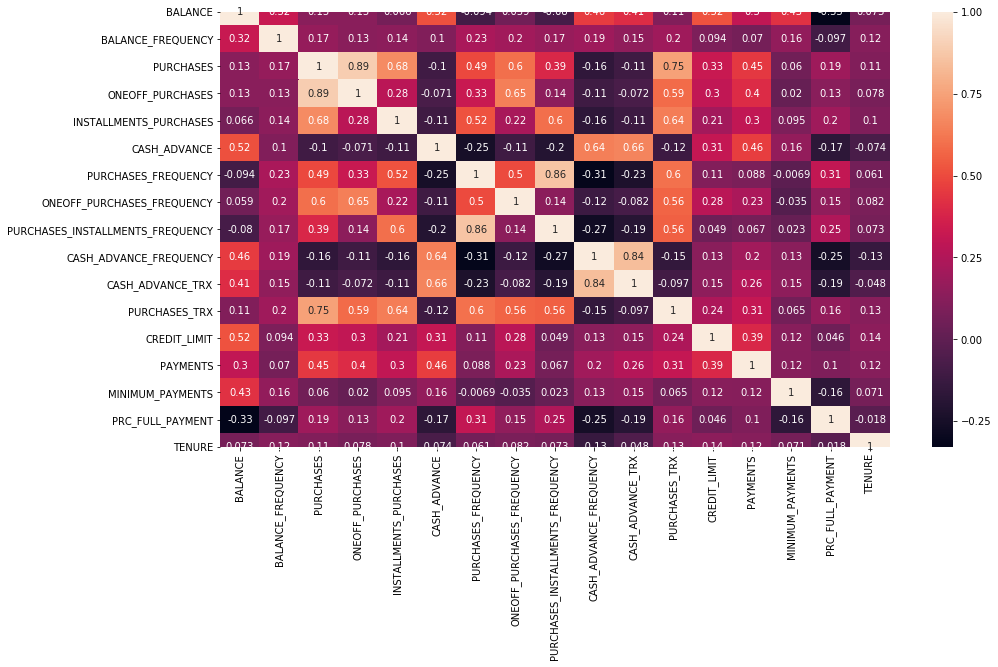

In [16]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot = True)
plt.show()

We can see that there is some intercorrelation between features. This might affect the results of the overall model. We can try to deal with these using PCA.

{2: 0.47723119113822354, 3: 0.5642415268571761, 4: 0.6467934218793554, 5: 0.7155015182082853, 6: 0.7745499371435273, 7: 0.8247858538994913, 8: 0.8645661752993441, 9: 0.8985011158870405, 10: 0.9271100785318187, 11: 0.9450007536909661, 12: 0.9620893860600487, 13: 0.9759212922555333, 14: 0.9882474945870438}


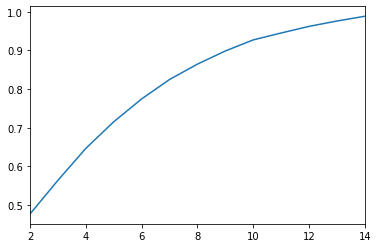

In [18]:
ratio_arr = {}
for i in range(2,15):
    pca=PCA(n_components=i)
    pca_data = pca.fit(df_scaled)
    ratio_arr[i]=sum(pca_data.explained_variance_ratio_)
print(ratio_arr)
pd.Series(ratio_arr).plot()
plt.show()

From the figure we can see that more than 80% of the variance in the data can be explained with 7 components. Sp I will use PCA to reduce the data to 7 components.

In [19]:
pca = PCA(n_components=7).fit_transform(df_scaled)
X = pd.DataFrame(pca)
X.head()

,0,1,2,3,4,5,6
0,-1.149399,-1.675472,0.167858,-0.773247,-0.098920,-0.129910,0.448564
1,-2.056458,1.793736,0.690429,0.289672,1.193387,-0.286886,-0.568843
2,1.275842,0.410492,1.248888,-1.171754,-1.597924,-0.276094,-0.903035
3,-0.987604,-0.424599,1.562631,-0.621198,0.207907,0.645283,0.073865
4,-1.210388,-1.226118,0.174348,-1.139214,-0.484899,-0.398099,-0.011465


In [20]:
X.shape

(8890, 7)

## Modelling

I will be using K-meanss clustering and Agglomerative clustering to cluster customers into groups for targetted marketing. I will be using the elbow method to identify the number of clusters needed. and based on the cluster will be identifying characteristics of customers.

### K-means Clustering

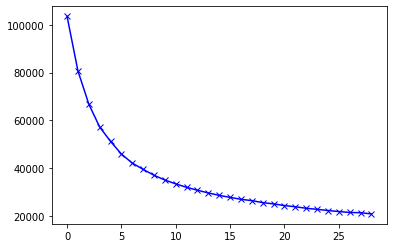

In [21]:
n_clusters=30
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(X)
    cost.append(kmean.inertia_)
    
plt.plot(cost, 'bx-')
plt.show()

Using the elbow method, we can see that the elbow occurs around n=5. Therefore this is the number of clusters I have chosen.

In [40]:
clusters = 5
colors = ['red','green','blue','pink','yellow']

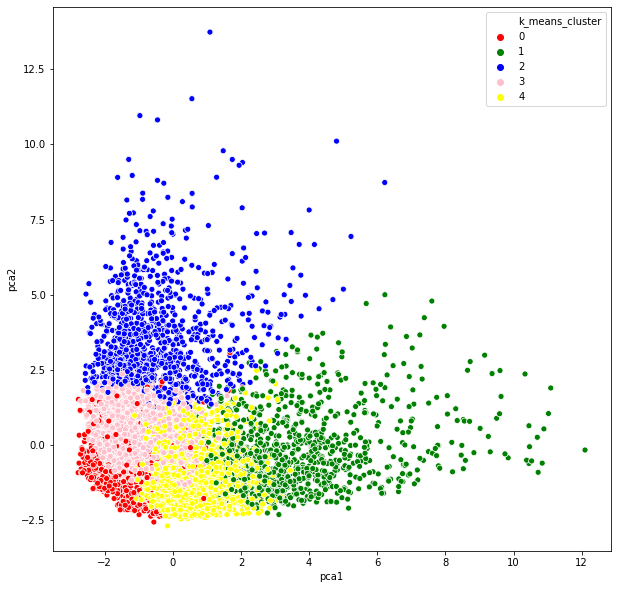

In [41]:
kmean = KMeans(clusters).fit(X)
k_means_labels = kmean.labels_

pca_df['k_means_cluster'] = k_means_labels

plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "k_means_cluster", data = pca_df, palette = colors)
plt.show()

In [29]:
pca_df["k_means_cluster"].value_counts()

1    3080
0    2262
3    1339
2    1145
4    1064
Name: k_means_cluster, dtype: int64

I have used PCA to help visualize the clusters. The boundaries between the clusters are quite clear with some overlap possibily due to the effects of the PCA.

### Agglomerative Clustering

I have used the number of cluster obtained from the elbow method to perform the Agglomerative clustering.

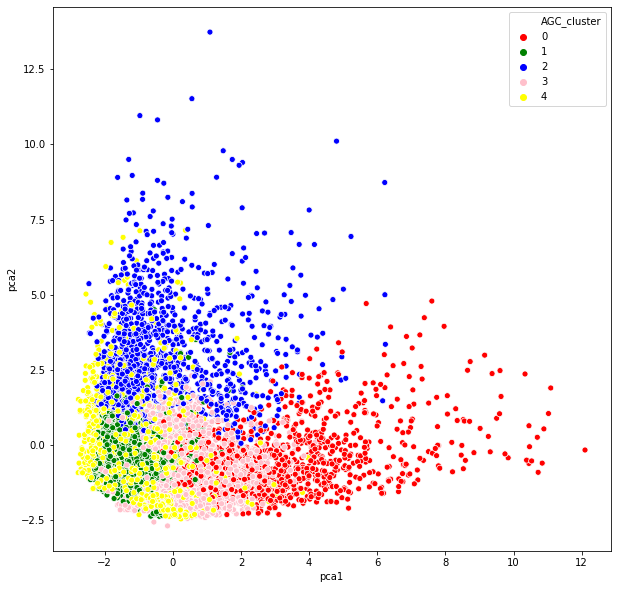

In [30]:
AGC = AgglomerativeClustering(n_clusters=clusters, linkage='ward').fit(X)
AGC_labels = AGC.labels_

pca_df['AGC_cluster'] = AGC_labels

plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "AGC_cluster", data = pca_df, palette = colors)
plt.show()

In [31]:
pca_df["AGC_cluster"].value_counts()

1    3101
3    2026
2    1487
0    1377
4     899
Name: AGC_cluster, dtype: int64

Compared to the k-means algorithm, the bounderies are not quite as prominent with a fair bit of overlap. Which is why I have decided to use k-means as the best model.

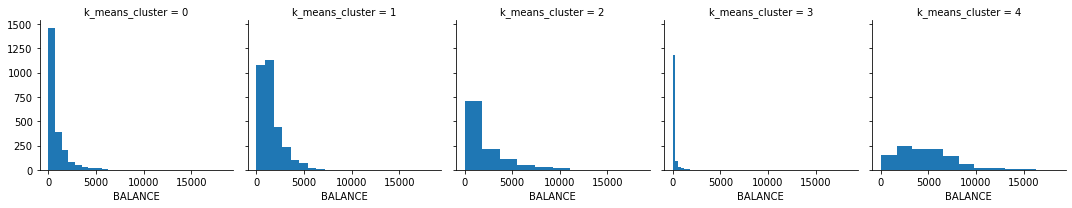

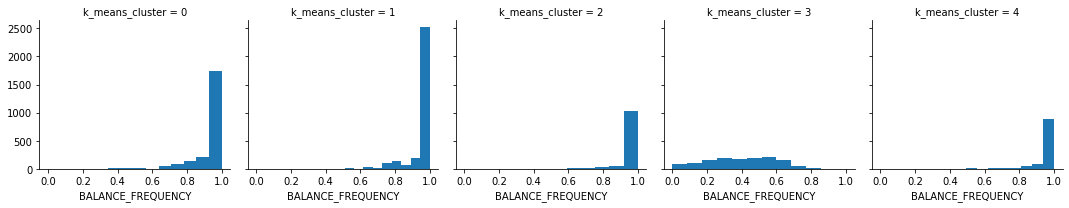

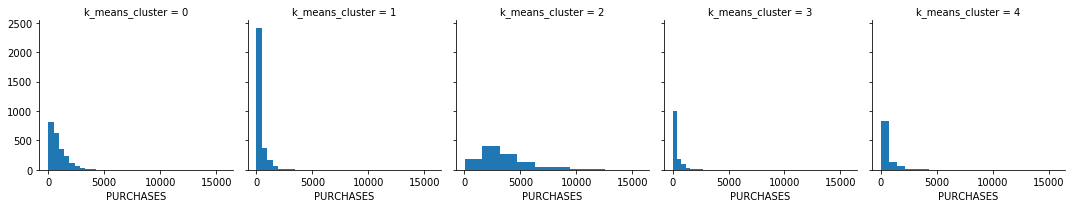

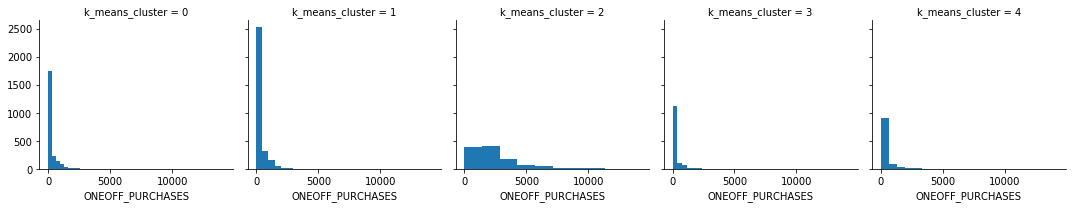

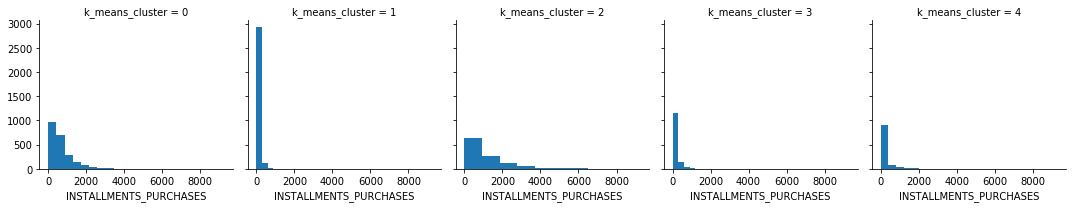

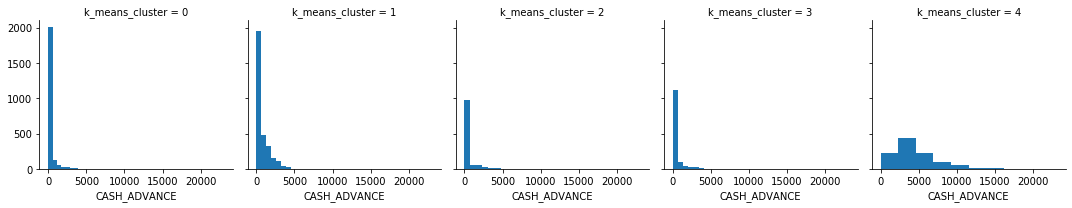

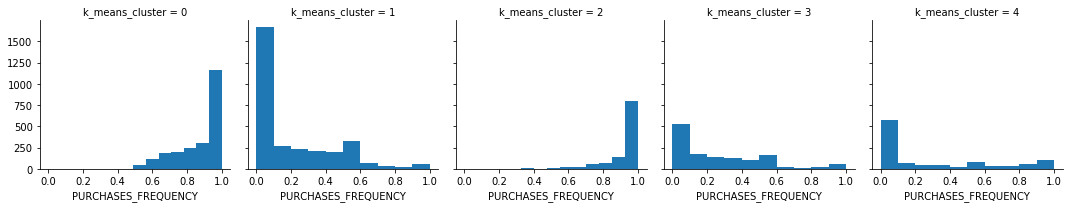

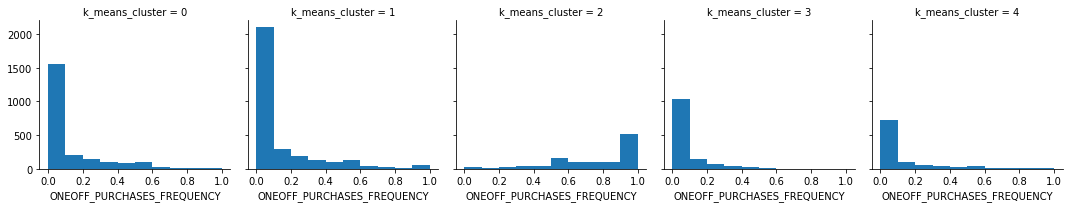

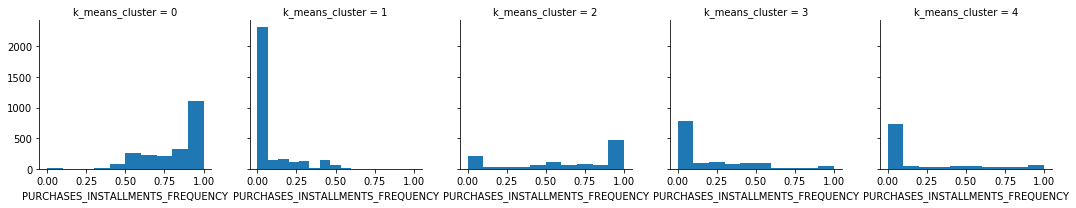

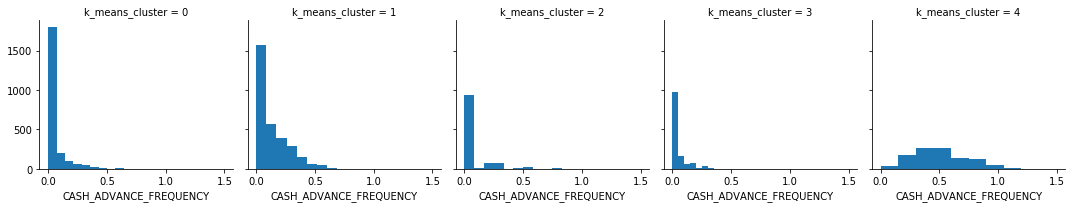

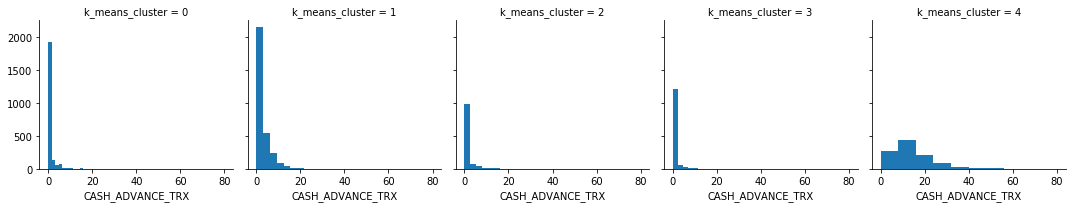

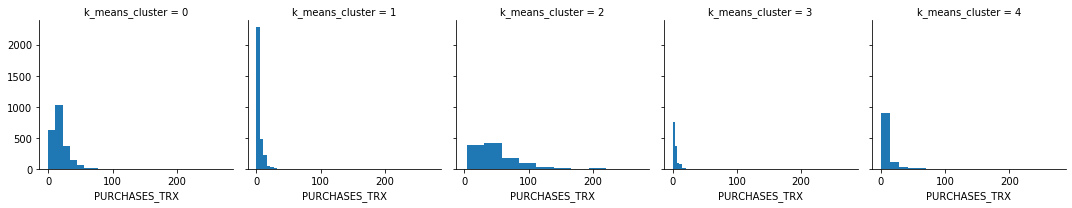

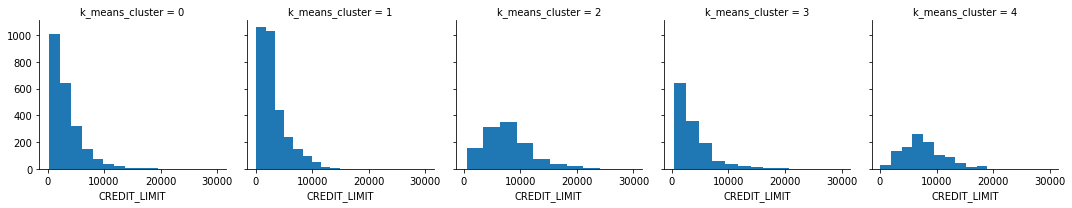

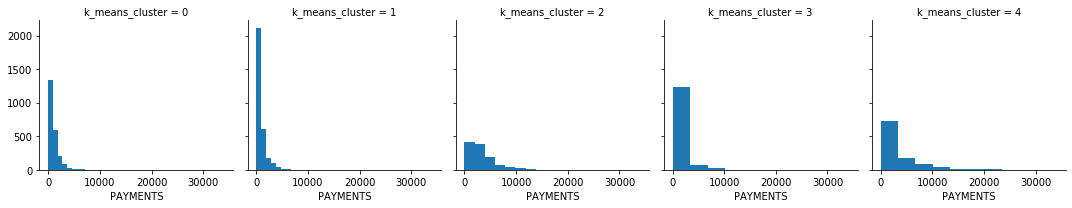

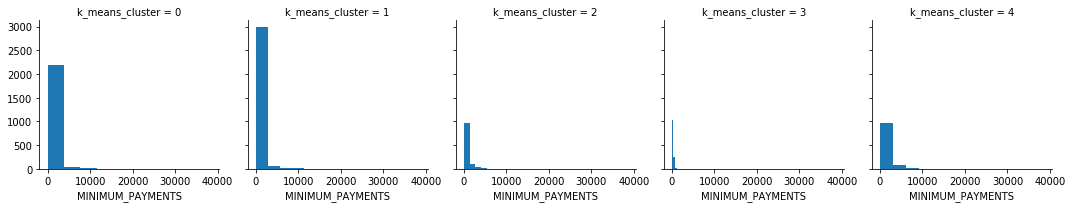

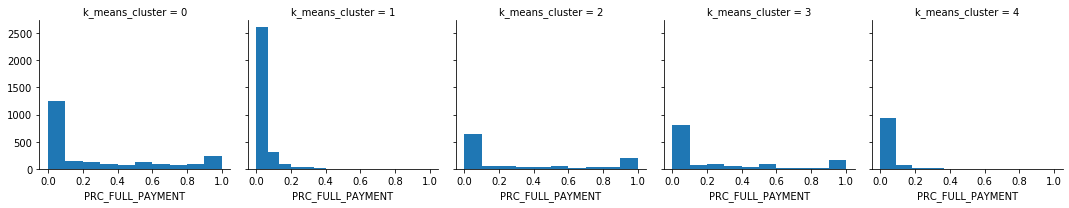

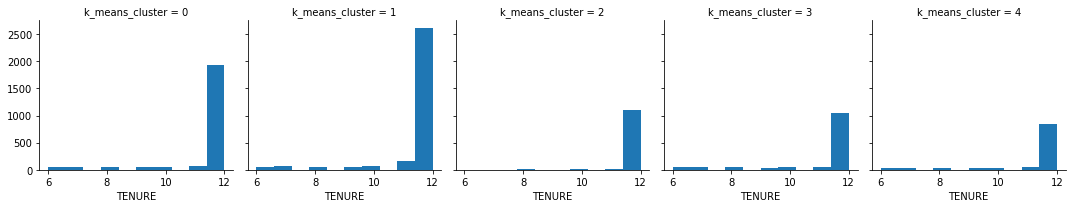

In [35]:
df['k_means_cluster'] = k_means_labels

for c in df[df.columns[:-1]]:
    grid = sns.FacetGrid(df, col='k_means_cluster')
    grid.map(plt.hist, c)

Based on the plot drawn from the clusters a few conclusions can be drawn.

* Cluster 0: Low credit limit, high frequency of low cost purchases usually in installments, higher percentage of full payments(low income spenders?)
* Cluster 1: Low-medium credit limit, low purchase frequency (infrequent credit card user?)
* Cluster 2: High credit limit, high purchase frequency, expensive purchases (high income spenders?)
* Cluster 3: Low-medium credit limit, low bank balance, low purchase frequency, higher installment purchases (low income savers?)
* Cluster 4: High credit limit, high bank balance, take more cash in advance (high income savers?)